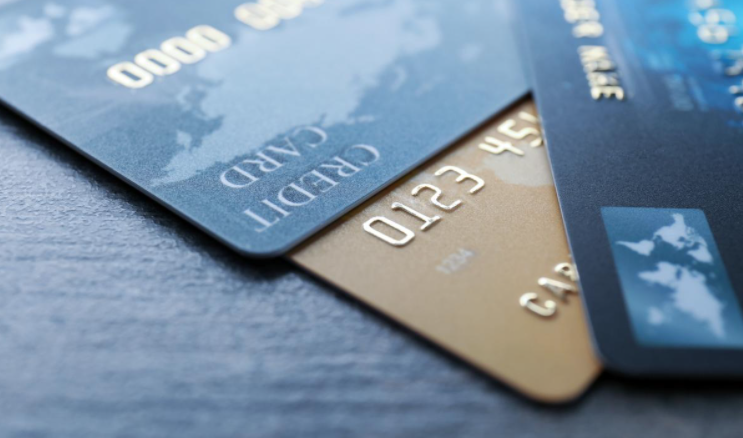

In [1]:
#Importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Reading the file

credit = pd.read_csv("crx.csv", header = None)
credit.head(20)

0      1       2  3  4   5  6      7  8  9   10 11 12   13     14 15
0   b  30.83   0.000  u  g   w  v  1.250  t  t   1  f  g  202      0  +
1   a  58.67   4.460  u  g   q  h  3.040  t  t   6  f  g   43    560  +
2   a   24.5   0.500  u  g   q  h  1.500  t  f   0  f  g  280    824  +
3   b  27.83   1.540  u  g   w  v  3.750  t  t   5  t  g  100      3  +
4   b  20.17   5.625  u  g   w  v  1.710  t  f   0  f  s  120      0  +
5   b  32.08   4.000  u  g   m  v  2.500  t  f   0  t  g  360      0  +
6   b  33.17   1.040  u  g   r  h  6.500  t  f   0  t  g  164  31285  +
7   a  22.92  11.585  u  g  cc  v  0.040  t  f   0  f  g   80   1349  +
8   b  54.42   0.500  y  p   k  h  3.960  t  f   0  f  g  180    314  +
9   b   42.5   4.915  y  p   w  v  3.165  t  f   0  t  g   52   1442  +
10  b  22.08   0.830  u  g   c  h  2.165  f  f   0  t  g  128      0  +
11  b  29.92   1.835  u  g   c  h  4.335  t  f   0  f  g  260    200  +
12  a  38.25   6.000  u  g   k  v  1.000  t  f   0  t  g    0      0  +
13  b  48.08   6.040  u  g   k  v  0.040  f  f   0  f  g    0   2690  +
14  a  45.83  10.500  u  g   q  v  5.000  t  t   7  t  g    0      0  +
15  b  36.67   4.415  y  p   k  v  0.250  t  t  10  t  g  320      0  +
16  b  28.25   0.875  u  g   m  v  0.960  t  t   3  t  g  396      0  +
17  a  23.25   5.875  u  g   q  v  3.170  t  t  10  f  g  120    245  +
18  b  21.83   0.250  u  g   d  h  0.665  t  f   0  t  g    0      0  +
19  a  19.17   8.585  u  g  cc  h  0.750  t  t   7  f  g   96      0  +

In [3]:
#Adding the appropriate columns
credit.columns = ["gender", "age", "debt", "married", "bank_customer", "education_level", "ethnicity", "years_employed",
                 "prior_default", "employed", "credit_score", "drivers_license", "citizens",
                 "zipcode", "income", "approvalstatus"]

### Exploring the dataset

In [4]:
#We see a mix of ints, floats and objects
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   gender           690 non-null    object 
 1   age              690 non-null    object 
 2   debt             690 non-null    float64
 3   married          690 non-null    object 
 4   bank_customer    690 non-null    object 
 5   education_level  690 non-null    object 
 6   ethnicity        690 non-null    object 
 7   years_employed   690 non-null    float64
 8   prior_default    690 non-null    object 
 9   employed         690 non-null    object 
 10  credit_score     690 non-null    int64  
 11  drivers_license  690 non-null    object 
 12  citizens         690 non-null    object 
 13  zipcode          690 non-null    object 
 14  income           690 non-null    int64  
 15  approvalstatus   690 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 86.4+ KB


In [5]:
#Descriptive statistics

credit.describe()

debt  years_employed  credit_score         income
count  690.000000      690.000000     690.00000     690.000000
mean     4.758725        2.223406       2.40000    1017.385507
std      4.978163        3.346513       4.86294    5210.102598
min      0.000000        0.000000       0.00000       0.000000
25%      1.000000        0.165000       0.00000       0.000000
50%      2.750000        1.000000       0.00000       5.000000
75%      7.207500        2.625000       3.00000     395.500000
max     28.000000       28.500000      67.00000  100000.000000

### Data Cleaning

In [6]:
#Replacing "?" with nan values

clean_credit = credit.replace("?", np.NaN)
print(clean_credit.head())

  gender    age   debt married bank_customer education_level ethnicity  \
0      b  30.83  0.000       u             g               w         v   
1      a  58.67  4.460       u             g               q         h   
2      a   24.5  0.500       u             g               q         h   
3      b  27.83  1.540       u             g               w         v   
4      b  20.17  5.625       u             g               w         v   

   years_employed prior_default employed  credit_score drivers_license  \
0            1.25             t        t             1               f   
1            3.04             t        t             6               f   
2            1.50             t        f             0               f   
3            3.75             t        t             5               t   
4            1.71             t        f             0               f   

  citizens zipcode  income approvalstatus  
0        g     202       0              +  
1        g      43    

In [7]:
#Check for number of Nan values

clean_credit.isnull().sum()

gender             12
age                12
debt                0
married             6
bank_customer       6
education_level     9
ethnicity           9
years_employed      0
prior_default       0
employed            0
credit_score        0
drivers_license     0
citizens            0
zipcode            13
income              0
approvalstatus      0
dtype: int64

In [8]:
#Impute missing values with mean

clean_credit.fillna(clean_credit.mean(), inplace=True)

In [9]:
#Fill missing values in categorical values with most frequent values

for col in clean_credit.columns:
    if clean_credit[col].dtypes == "object":
        clean_credit = clean_credit.fillna(clean_credit[col].value_counts().index[0])

In [10]:
#Recheck for null values after imputation
clean_credit.isnull().sum()

gender             0
age                0
debt               0
married            0
bank_customer      0
education_level    0
ethnicity          0
years_employed     0
prior_default      0
employed           0
credit_score       0
drivers_license    0
citizens           0
zipcode            0
income             0
approvalstatus     0
dtype: int64

### Exploratory Data Analysis

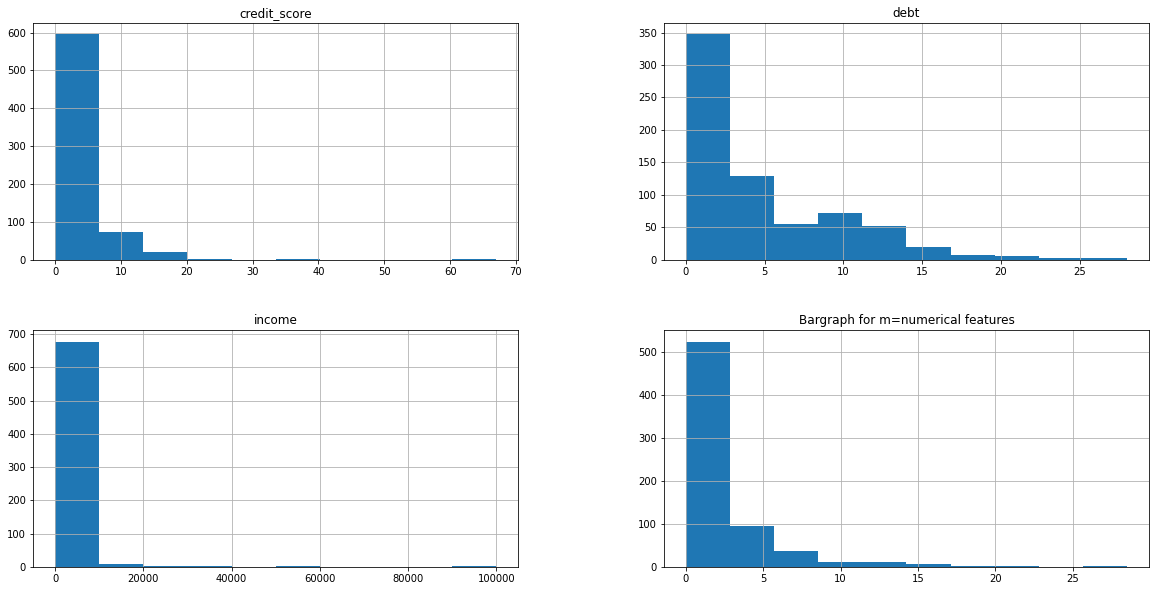

In [97]:
#Histogram to show distribution of variables
clean_credit.hist(figsize=(20,10))

plt.show()

In [11]:
import plotly.express as px
import plotly.graph_objects as go

fig = px.bar(clean_credit, x="education_level", y = "income", color = "education_level", title = "Barplot of education level and income")
fig.show()

From the barplot above, we see that there are some differences that exist between education level attained and respective incomes. The "aa" and "c" groups have significantly higher levels of income than some of the the other groups.

In [12]:
fig = px.bar(clean_credit, x = "ethnicity", y ="debt", color ="ethnicity", title = "Barplot of ethnicity and debt level")
fig.show()

We see that some ethnicities have higher debt levels than other. For example, "v" ethnicity have profundly higher rates of debt other ethnicities.

In [13]:
fig = px.box(clean_credit, x = "gender", y ="debt", color ="gender", title = "Boxplot of gender and debt")
fig.show()

Different genders also have varying levels of debt and there is significant spread of data for the "a" gender however, there is significantly more outliers for the "b" gender.

In [14]:
fig = px.box(clean_credit, x = "married", y ="debt", color ="married", title = "Box plot of married category and debt")
fig.show()

We also see varying levels of debt based on different categories of marital status.

In [15]:
fig = px.scatter(clean_credit, x="age", y="debt",title = "Scatterplot of debt and age")
fig.show()

We see a dense cluster of individuals between the ages of 20-40 years having moderate to low amount of debt. We also see that as individuals get older they tend to have higher levels of debt. 

In [16]:
cor = clean_credit[[ "debt", "years_employed", "credit_score", "income", "age"]]
cor

debt  years_employed  credit_score  income    age
0     0.000            1.25             1       0  30.83
1     4.460            3.04             6     560  58.67
2     0.500            1.50             0     824   24.5
3     1.540            3.75             5       3  27.83
4     5.625            1.71             0       0  20.17
..      ...             ...           ...     ...    ...
685  10.085            1.25             0       0  21.08
686   0.750            2.00             2     394  22.67
687  13.500            2.00             1       1  25.25
688   0.205            0.04             0     750  17.92
689   3.375            8.29             0       0     35

[690 rows x 5 columns]

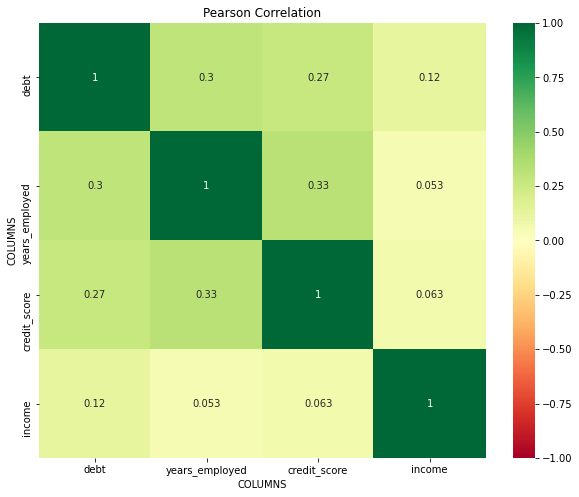

In [103]:
corrPearson = cor.corr(method = "pearson")

figure = plt.figure(figsize=(10,8))
sns.heatmap(corrPearson,annot=True,cmap='RdYlGn', vmin=-1, vmax=+1)
plt.title("Pearson Correlation")
plt.xlabel("COLUMNS")
plt.ylabel("COLUMNS")
plt.show()

In [18]:
#Checking variance of numerical variables - we see significant variances in the income column
variance = cor.var()
print(variance)

debt              2.478211e+01
years_employed    1.119915e+01
credit_score      2.364819e+01
income            2.714517e+07
dtype: float64


### Data Preprocessing

In [31]:
#Dealing with categorical columns using label encoder
pd.set_option('display.max_columns', None)
final= pd.get_dummies(clean_credit, columns = ["gender", "married", "bank_customer", "education_level", "ethnicity",
                                                     "prior_default", "employed", "citizens"])
final

age    debt  years_employed  credit_score drivers_license zipcode  \
0    30.83   0.000            1.25             1               f     202   
1    58.67   4.460            3.04             6               f      43   
2     24.5   0.500            1.50             0               f     280   
3    27.83   1.540            3.75             5               t     100   
4    20.17   5.625            1.71             0               f     120   
..     ...     ...             ...           ...             ...     ...   
685  21.08  10.085            1.25             0               f     260   
686  22.67   0.750            2.00             2               t     200   
687  25.25  13.500            2.00             1               t     200   
688  17.92   0.205            0.04             0               f     280   
689     35   3.375            8.29             0               t       0   

     income approvalstatus  gender_a  gender_b  married_b  married_l  \
0         0              +         0         1          0          0   
1       560              +         1         0          0          0   
2       824              +         1         0          0          0   
3         3              +         0         1          0          0   
4         0              +         0         1          0          0   
..      ...            ...       ...       ...        ...        ...   
685       0              -         0         1          0          0   
686     394              -         1         0          0          0   
687       1              -         1         0          0          0   
688     750              -         0         1          0          0   
689       0              -         0         1          0          0   

     married_u  married_y  bank_customer_b  bank_customer_g  bank_customer_gg  \
0            1          0                0                1                 0   
1            1          0                0                1                 0   
2            1          0                0                1                 0   
3            1          0                0                1                 0   
4            1          0                0                1                 0   
..         ...        ...              ...              ...               ...   
685          0          1                0                0                 0   
686          1          0                0                1                 0   
687          0          1                0                0                 0   
688          1          0                0                1                 0   
689          1          0                0                1                 0   

     bank_customer_p  education_level_aa  education_level_b  \
0                  0                   0                  0   
1                  0                   0                  0   
2                  0                   0                  0   
3                  0                   0                  0   
4                  0                   0                  0   
..               ...                 ...                ...   
685                1                   0                  0   
686                0                   0                  0   
687                1                   0                  0   
688                0                   1                  0   
689                0                   0                  0   

     education_level_c  education_level_cc  education_level_d  \
0                    0                   0                  0   
1                    0                   0                  0   
2                    0                   0                  0   
3                    0                   0                  0   
4                    0                   0                  0   
..                 ...                 ...                ...   
685                  0                   0  

In [33]:
#Checking the number of columns an rows - zipcode and drivers license are not important features for credir card approvals so they are dropped
final.shape

(690, 50)

In [36]:
#Drop irrelevant columns - zipcode and drivers_license are not important features for credit card approvals

final = final.drop(["drivers_license", "zipcode"], axis = 1)
final.shape

(690, 48)

In [37]:
#Overwriting approvalstatus column with appropriate labels

final["target"] = pd.DataFrame(final["approvalstatus"].replace({"+": 1, "-":0}))
final

age    debt  years_employed  credit_score  income approvalstatus  \
0    30.83   0.000            1.25             1       0              +   
1    58.67   4.460            3.04             6     560              +   
2     24.5   0.500            1.50             0     824              +   
3    27.83   1.540            3.75             5       3              +   
4    20.17   5.625            1.71             0       0              +   
..     ...     ...             ...           ...     ...            ...   
685  21.08  10.085            1.25             0       0              -   
686  22.67   0.750            2.00             2     394              -   
687  25.25  13.500            2.00             1       1              -   
688  17.92   0.205            0.04             0     750              -   
689     35   3.375            8.29             0       0              -   

     gender_a  gender_b  married_b  married_l  married_u  married_y  \
0           0         1          0          0          1          0   
1           1         0          0          0          1          0   
2           1         0          0          0          1          0   
3           0         1          0          0          1          0   
4           0         1          0          0          1          0   
..        ...       ...        ...        ...        ...        ...   
685         0         1          0          0          0          1   
686         1         0          0          0          1          0   
687         1         0          0          0          0          1   
688         0         1          0          0          1          0   
689         0         1          0          0          1          0   

     bank_customer_b  bank_customer_g  bank_customer_gg  bank_customer_p  \
0                  0                1                 0                0   
1                  0                1                 0                0   
2                  0                1                 0                0   
3                  0                1                 0                0   
4                  0                1                 0                0   
..               ...              ...               ...              ...   
685                0                0                 0                1   
686                0                1                 0                0   
687                0                0                 0                1   
688                0                1                 0                0   
689                0                1                 0                0   

     education_level_aa  education_level_b  education_level_c  \
0                     0                  0                  0   
1                     0                  0                  0   
2                     0                  0                  0   
3                     0                  0                  0   
4                     0                  0                  0   
..                  ...                ...                ...   
685                   0                  0                  0   
686                   0                  0                  1   
687                   0                  0                  0   
688                   1                  0                  0   
689                   0                  0                  1   

     education_level_cc  education_level_d  education_level_e  \
0                     0                  0                  0   
1                     0                  0                  0   
2                     0                  0                  0   
3                     0                  0                  0   
4                     0                  0                  0   
..                  ...                ...                ...   
685                   0                  0                  1   
686                   0                

In [38]:
#Dropping the approval status column since we now have the target column with the same information

final = final.drop("approvalstatus", axis = 1)

In [39]:
#A few rows were found to erroneaously have "b" in the age columns - these rows were removed
final = final[final.age != "b"]

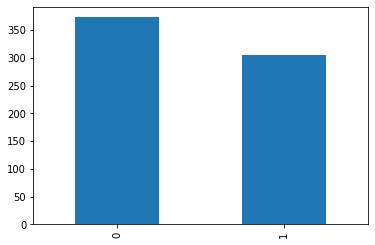

In [40]:
#Checking for class imbalance - there are a few more 0 (non-defaults) then there are 1s
final['target'].value_counts().plot(kind='bar')

### t-SNE visualization for high dimensional data

In [41]:
from sklearn.manifold import TSNE

#Initializing the tsne

model = TSNE(learning_rate = 180)

#Standardize the values

In [42]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [43]:
samples = final.drop("target", axis = 1)
samples

age    debt  years_employed  credit_score  income  gender_a  gender_b  \
0    30.83   0.000            1.25             1       0         0         1   
1    58.67   4.460            3.04             6     560         1         0   
2     24.5   0.500            1.50             0     824         1         0   
3    27.83   1.540            3.75             5       3         0         1   
4    20.17   5.625            1.71             0       0         0         1   
..     ...     ...             ...           ...     ...       ...       ...   
685  21.08  10.085            1.25             0       0         0         1   
686  22.67   0.750            2.00             2     394         1         0   
687  25.25  13.500            2.00             1       1         1         0   
688  17.92   0.205            0.04             0     750         0         1   
689     35   3.375            8.29             0       0         0         1   

     married_b  married_l  married_u  married_y  bank_customer_b  \
0            0          0          1          0                0   
1            0          0          1          0                0   
2            0          0          1          0                0   
3            0          0          1          0                0   
4            0          0          1          0                0   
..         ...        ...        ...        ...              ...   
685          0          0          0          1                0   
686          0          0          1          0                0   
687          0          0          0          1                0   
688          0          0          1          0                0   
689          0          0          1          0                0   

     bank_customer_g  bank_customer_gg  bank_customer_p  education_level_aa  \
0                  1                 0                0                   0   
1                  1                 0                0                   0   
2                  1                 0                0                   0   
3                  1                 0                0                   0   
4                  1                 0                0                   0   
..               ...               ...              ...                 ...   
685                0                 0                1                   0   
686                1                 0                0                   0   
687                0                 0                1                   0   
688                1                 0                0                   1   
689                1                 0                0                   0   

     education_level_b  education_level_c  education_level_cc  \
0                    0                  0                   0   
1                    0                  0                   0   
2                    0                  0                   0   
3                    0                  0                   0   
4                    0                  0                   0   
..                 ...                ...                 ...   
685                  0                  0                   0   
686                  0                  1                   0   
687                  0                  0                   0   
688                  0                  0                   0   
689                  0                  1                   0   

     education_level_d  education_level_e  education_level_ff  \
0                    0                  0                   0   
1                    0                  0                   0   
2                    0                  0                   0   
3                    0                  0                   0   
4                    0                  0                   0   
..                 ...                ...                 ...   
685                  0                  1   

In [45]:
samples_2 = final[["age","debt", "years_employed", "income"]]

In [46]:
#Fitting the standard scaler on numerical variables only.

standard_samples = scaler.fit_transform(samples_2)
print(standard_samples)

[[-0.0617766  -0.9567587  -0.28648283 -0.19459252]
 [ 2.26811754 -0.06360709  0.24811949 -0.08788718]
 [-0.59152623 -0.8566296  -0.2118177  -0.03758323]
 ...
 [-0.52875969  1.74672713 -0.06248744 -0.19440198]
 [-1.14219805 -0.91570577 -0.64786204 -0.05168358]
 [ 0.28720539 -0.28088725  1.81608717 -0.19459252]]


In [47]:
#Dropping the values of the standardized variables

sample_3 = samples.drop(["age","debt", "years_employed", "income"], axis = 1)

#Convert into numpy array

sample_4 = sample_3.values

In [66]:
print(sample_3)

     credit_score  gender_a  gender_b  married_b  married_l  married_u  \
0               1         0         1          0          0          1   
1               6         1         0          0          0          1   
2               0         1         0          0          0          1   
3               5         0         1          0          0          1   
4               0         0         1          0          0          1   
..            ...       ...       ...        ...        ...        ...   
685             0         0         1          0          0          0   
686             2         1         0          0          0          1   
687             1         1         0          0          0          0   
688             0         0         1          0          0          1   
689             0         0         1          0          0          1   

     married_y  bank_customer_b  bank_customer_g  bank_customer_gg  \
0            0                0          

In [48]:
#Concatenating the both arrays
samples_tsne = np.concatenate((standard_samples, sample_4), axis = 1)

In [63]:
final.columns

Index(['age', 'debt', 'years_employed', 'credit_score', 'income', 'gender_a',
       'gender_b', 'married_b', 'married_l', 'married_u', 'married_y',
       'bank_customer_b', 'bank_customer_g', 'bank_customer_gg',
       'bank_customer_p', 'education_level_aa', 'education_level_b',
       'education_level_c', 'education_level_cc', 'education_level_d',
       'education_level_e', 'education_level_ff', 'education_level_i',
       'education_level_j', 'education_level_k', 'education_level_m',
       'education_level_q', 'education_level_r', 'education_level_w',
       'education_level_x', 'ethnicity_b', 'ethnicity_bb', 'ethnicity_dd',
       'ethnicity_ff', 'ethnicity_h', 'ethnicity_j', 'ethnicity_n',
       'ethnicity_o', 'ethnicity_v', 'ethnicity_z', 'prior_default_f',
       'prior_default_t', 'employed_f', 'employed_t', 'citizens_g',
       'citizens_p', 'citizens_s', 'target'],
      dtype='object')

In [69]:
#Reordering of columns for final feature importance
columns = ["age","debt", "years_employed", "income", "credit_score",'gender_a',
       'gender_b', 'married_b', 'married_l', 'married_u', 'married_y',
       'bank_customer_b', 'bank_customer_g', 'bank_customer_gg',
       'bank_customer_p', 'education_level_aa', 'education_level_b',
       'education_level_c', 'education_level_cc', 'education_level_d',
       'education_level_e', 'education_level_ff', 'education_level_i',
       'education_level_j', 'education_level_k', 'education_level_m',
       'education_level_q', 'education_level_r', 'education_level_w',
       'education_level_x', 'ethnicity_b', 'ethnicity_bb', 'ethnicity_dd',
       'ethnicity_ff', 'ethnicity_h', 'ethnicity_j', 'ethnicity_n',
       'ethnicity_o', 'ethnicity_v', 'ethnicity_z', 'prior_default_f',
       'prior_default_t', 'employed_f', 'employed_t', 'citizens_g',
       'citizens_p', 'citizens_s']

In [49]:
#Converting target column to a list of values (for plotting purposes)

target_labels = list(final["target"])
len(target_labels)

678

In [50]:
#Fitting the tsne 
tsne_features = model.fit_transform(samples_tsne)

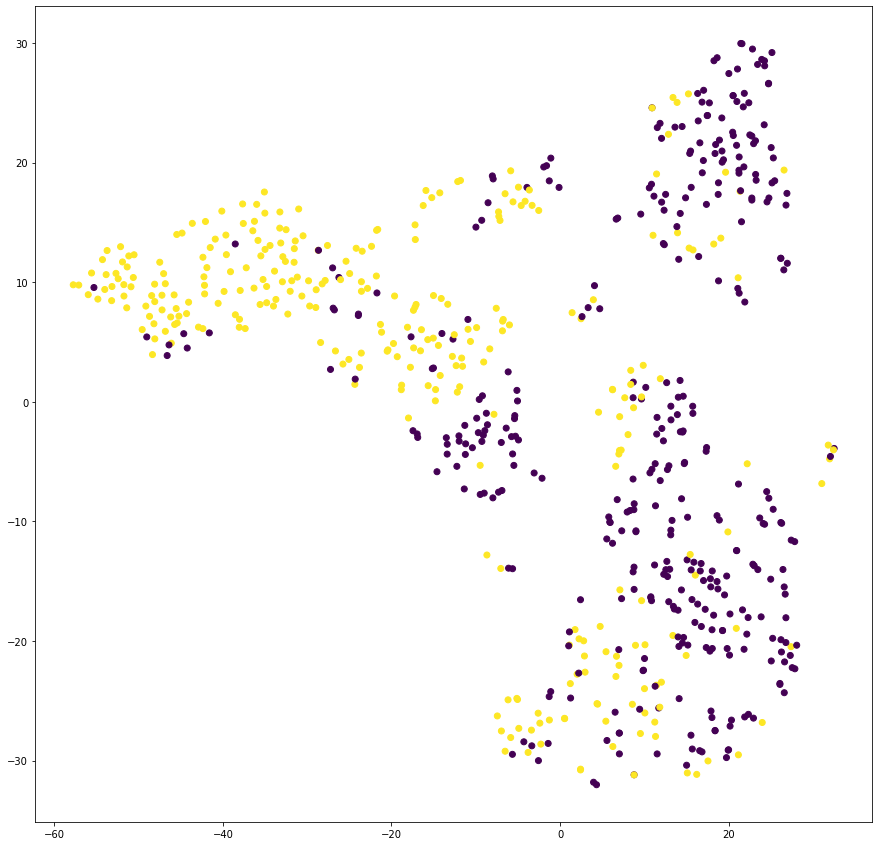

In [52]:
#visualizing the results of the tsne

xs = tsne_features[:,0]
ys = tsne_features[:,1]

plt.scatter(xs, ys, c = target_labels)
plt.rcParams["figure.figsize"] = [15,15]
plt.show()

### Implementing Random Forest 

In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

#The predictor variables and the target variable

X = samples_tsne
y = final["target"].values

In [54]:
#Implementing train-test-split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 2)

In [55]:
#random forest model creation

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [56]:
#Predictions

rfc_predict = rfc.predict(X_test)

In [57]:
#Using cross-validation

rfc_cv_score = cross_val_score(rfc, X, y, cv=5, scoring = "roc_auc")

In [58]:

print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, rfc_predict))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, rfc_predict))
print('\n')
print("=== All AUC Scores ===")
print(rfc_cv_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Random Forest: ", rfc_cv_score.mean())

=== Confusion Matrix ===
[[62 11]
 [ 8 55]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.89      0.85      0.87        73
           1       0.83      0.87      0.85        63

    accuracy                           0.86       136
   macro avg       0.86      0.86      0.86       136
weighted avg       0.86      0.86      0.86       136



=== All AUC Scores ===
[0.7810929  0.9895082  0.96786885 0.84237926 0.96167479]


=== Mean AUC Score ===
Mean AUC Score - Random Forest:  0.9085047998818491


In [59]:
#Gridsearch with cross-validation
from sklearn.model_selection import RandomizedSearchCV
# number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# number of features at every split
max_features = ['auto', 'sqrt']

# max depth
max_depth = [int(x) for x in np.linspace(100, 500, num = 11)]
max_depth.append(None)

# create random grid
random_grid = {
 'n_estimators': n_estimators,
 'max_features': max_features,
 'max_depth': max_depth
 }
# Random search of parameters
rfc_random = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the model
rfc_random.fit(X_train, y_train)
# print results
print(rfc_random.best_params_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   45.9s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  2.5min finished


{'n_estimators': 400, 'max_features': 'auto', 'max_depth': None}


In [60]:
rfc_1= RandomForestClassifier(n_estimators=400, max_depth=None, max_features='auto')
rfc_1.fit(X_train,y_train)
rfc_predict_1 = rfc_1.predict(X_test)
rfc_cv_score_1 = cross_val_score(rfc_1, X, y, cv=5, scoring='roc_auc')
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, rfc_predict_1))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, rfc_predict_1))
print('\n')
print("=== All AUC Scores ===")
print(rfc_cv_score_1)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Random Forest: ", rfc_cv_score_1.mean())

=== Confusion Matrix ===
[[63 10]
 [ 7 56]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.90      0.86      0.88        73
           1       0.85      0.89      0.87        63

    accuracy                           0.88       136
   macro avg       0.87      0.88      0.87       136
weighted avg       0.88      0.88      0.88       136



=== All AUC Scores ===
[0.78306011 0.99333333 0.97453552 0.83529021 0.9540319 ]


=== Mean AUC Score ===
Mean AUC Score - Random Forest:  0.9080502141485747


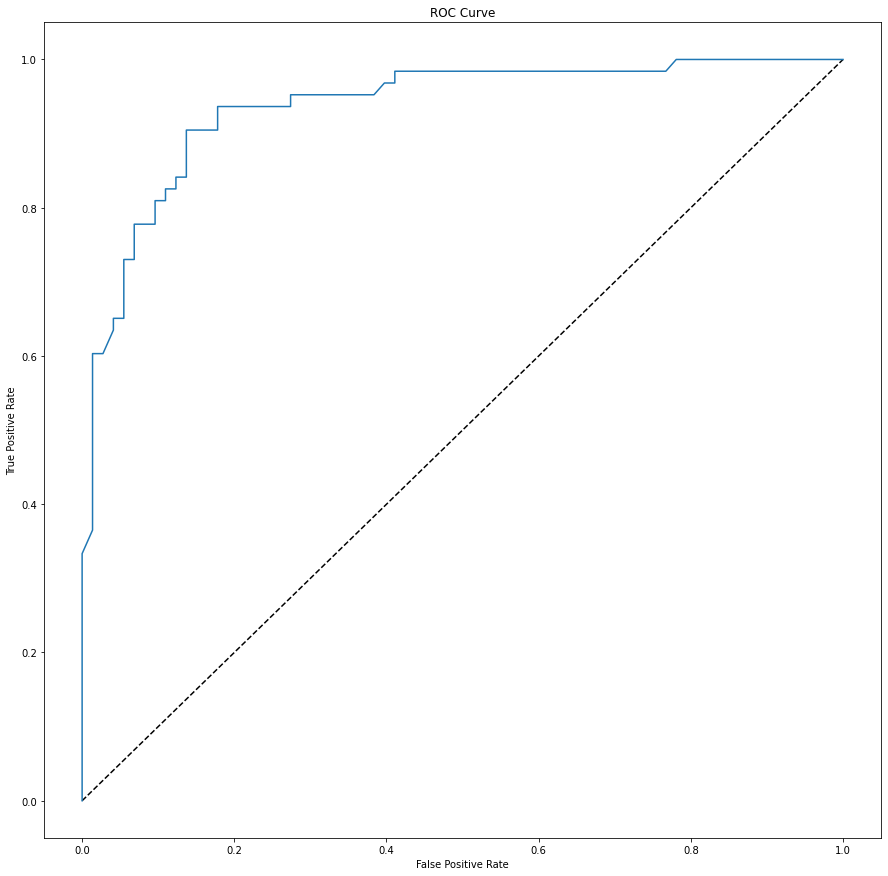

In [61]:
#Plotting the ROC curve
from sklearn.metrics import roc_curve

#Compute predicted probabilities: y_pred_prob
y_pred_prob = rfc_1.predict_proba(X_test)[:,1]

#Generate ROC curve values: fpr, tpr, thresholds

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

#Plot ROC curve

plt.plot([0,1], [0,1], "k--")
plt.plot(fpr, tpr, label = "Logistic Regression")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()


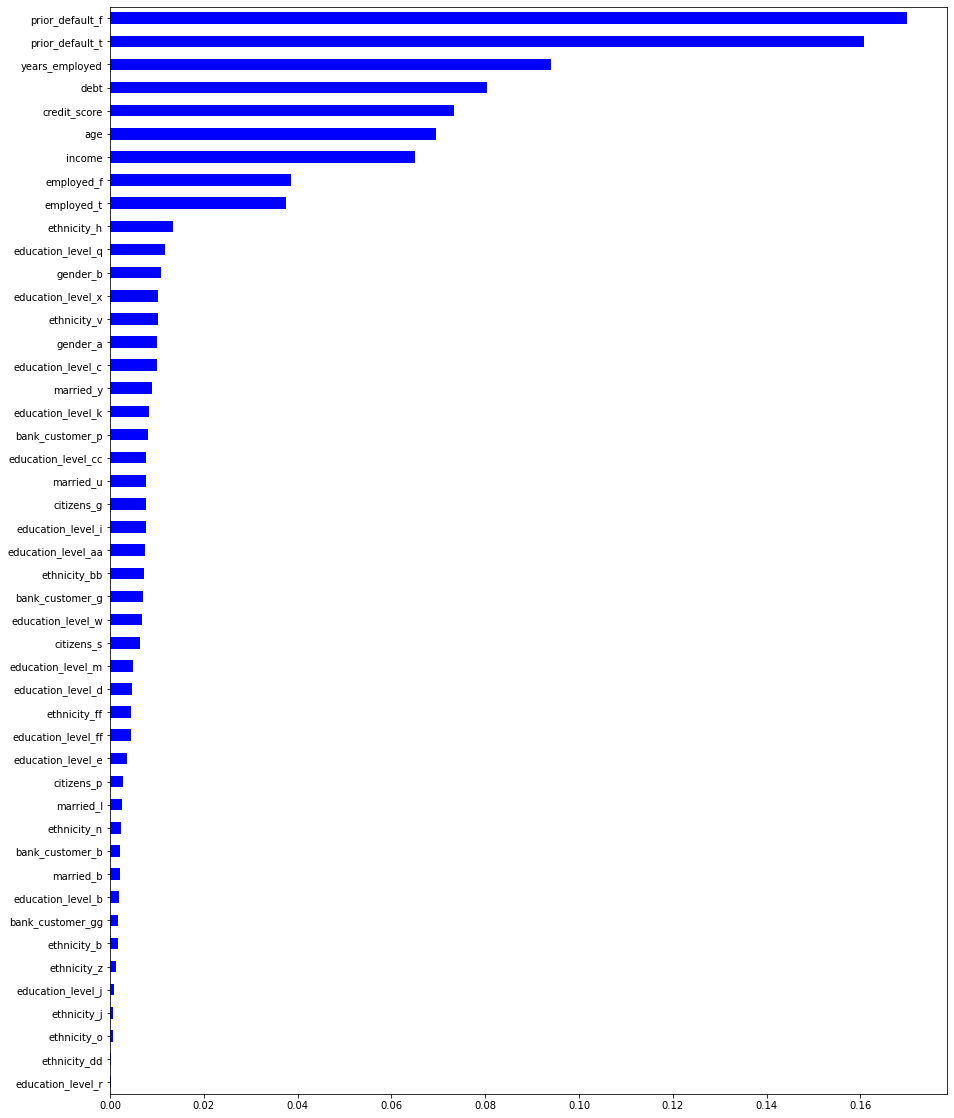

In [115]:
#Feature Importnace in sklearn

#Create a pd.Series of feature importances

importances_rf = pd.Series(rfc_1.feature_importances_, index = columns)

#Sort importances_rf

sorted_importances_rf = importances_rf.sort_values()

#Make a horizontal bar plot

sorted_importances_rf.plot(kind = "barh", color = "blue")
plt.rcParams["figure.figsize"] = [15,20]
#plt.clf()
plt.show()